In [1]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# 키와 몸무게 데이터 읽어 들이기 --- (※1)
tbl = pd.read_csv("../dataset/bmi.csv")
#print(tbl)
# 칼럼(열)을 자르고 정규화하기 --- (※2)
label = tbl["label"]
w = tbl["weight"] / 100 # 최대 100kg라고 가정
h = tbl["height"] / 200 # 최대 200cm라고 가정
wh = pd.concat([w, h], axis=1)
# 학습 전용 데이터와 테스트 전용 데이터로 나누기 --- (※3)
data_train, data_test, label_train, label_test = \
    train_test_split(wh, label)
    
# 데이터 학습하기 --- (※4)
clf = svm.SVC()
clf.fit(data_train, label_train)

# 데이터 예측하기 --- (※5)
predict = clf.predict(data_test)

# 결과 테스트하기 --- (※6)
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("정답률 =", ac_score)
print("리포트 =\n", cl_report)

정답률 = 0.989
리포트 =
              precision    recall  f1-score   support

        fat       1.00      0.99      1.00      1954
     normal       0.97      0.99      0.98      1496
       thin       0.99      0.98      0.99      1550

avg / total       0.99      0.99      0.99      5000



Text(0.5,1,'Petal')

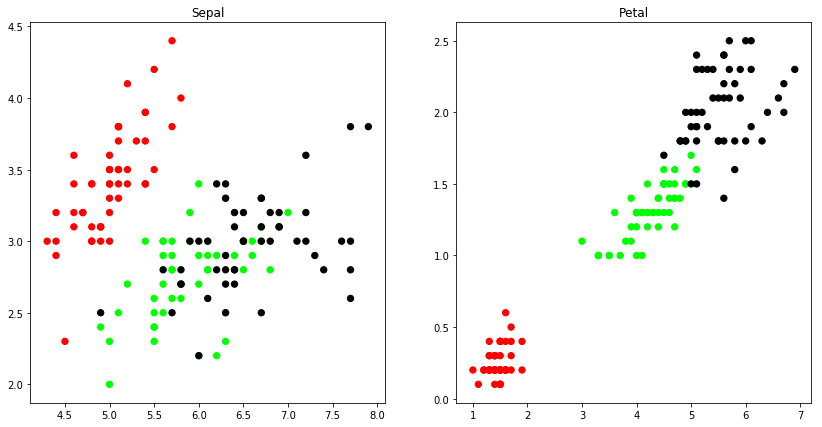

In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
 
import pandas as pd
import numpy as np
 
# Only needed if you want to display your plots inline if using Notebook
# change inline to auto if you have Spyder installed
%matplotlib inline

# import some data to play with
iris = datasets.load_iris()

iris.data
iris.feature_names
iris.target
iris.target_names

# Store the inputs as a Pandas Dataframe and set the column names
x = pd.DataFrame(iris.data)
x.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']
 
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

# Set the size of the plot
plt.figure(figsize=(14,7))
 
# Create a colormap
colormap = np.array(['red', 'lime', 'black'])
 
# Plot Sepal
plt.subplot(1, 2, 1)
plt.scatter(x.Sepal_Length, x.Sepal_Width, c=colormap[y.Targets], s=40)
plt.title('Sepal')
 
plt.subplot(1, 2, 2)
plt.scatter(x.Petal_Length, x.Petal_Width, c=colormap[y.Targets], s=40)
plt.title('Petal')

   SEPALLENGTH  SEPALWIDTH  PETALLENGTH  PETALWIDTH SPECIES
0          5.1         3.5          1.4         0.2  setosa
1          4.9         3.0          1.4         0.2  setosa
2          4.7         3.2          1.3         0.2  setosa
3          4.6         3.1          1.5         0.2  setosa
4          5.0         3.6          1.4         0.2  setosa


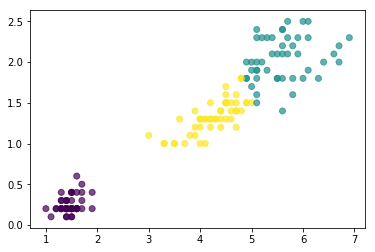

In [5]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Only needed if you want to display your plots inline if using Notebook
# change inline to auto if you have Spyder installed
%matplotlib inline

#CSV 파일을 읽어 DataFrame 변수에 저장하기
irisData = pd.read_csv("../dataset/iris.csv")
print(irisData.head())

name = irisData[["SPECIES"]]
features = irisData[["PETALLENGTH","PETALWIDTH"]]

#Create model and prediction
model = KMeans(n_clusters=3, algorithm="auto")
model.fit(features)
predict = pd.DataFrame(model.predict(features))
predict.columns=["PREDICT"]

#cncatenate labels to df as a new column / column binding
r = pd.concat([name, features, predict], axis = 1)

plt.scatter(r['PETALLENGTH'],r["PETALWIDTH"], c=r["PREDICT"], alpha=0.7)

r.to_csv("d:/irisresult.csv", index=False, encoding="utf-8-sig")

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Only needed if you want to display your plots inline if using Notebook
# change inline to auto if you have Spyder installed
%matplotlib inline

#CSV 파일을 읽어 DataFrame 변수에 저장하기
studentData = pd.read_csv("../dataset/student_middle.csv")

#<class 'pandas.core.frame.DataFrame'>
name = studentData[["NAME"]]
print("name type")
print(type(name))

#<class 'pandas.core.frame.DataFrame'>
features = studentData[["SW","DB","AND"]]
print("features type")
print(type(features))

#Create model and prediction
odel = KMeans
model = KMeans(n_clusters=2, algorithm="auto")
model.fit(features)
predict = pd.DataFrame(model.predict(features))
predict.columns=["PREDICT"]

#cncatenate labels to df as a new column / column binding
r = pd.concat([name, features, predict], axis = 1)
print(r)

plt.scatter(r['DB'],r["AND"], c=r["PREDICT"], alpha=0.7)

FileNotFoundError: File b'../dataset/student_middle.csv' does not exist

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Only needed if you want to display your plots inline if using Notebook
# change inline to auto if you have Spyder installed
%matplotlib inline

#CSV 파일을 읽어 DataFrame 변수에 저장하기
studentData = pd.read_csv("../dataset/student_middle2.csv")

print(studentData)

studentData = pd.get_dummies(studentData, columns = ["SW"])
print(studentData)

#Standardize
clmns = ["DB","AND","SW_뱀","SW_거미"]
df_tr_std = stats.zscore(studentData[clmns])
print(df_tr_std)

#Cluster the data
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_tr_std)
labels = kmeans.labels_

#Glue back to originaal data
studentData['clusters'] = labels

#Add the column into our list
clmns.extend(['clusters'])

#Lets analyze the clusters
print (studentData[clmns].groupby(['clusters']).mean())

FileNotFoundError: File b'../dataset/student_middle2.csv' does not exist

In [8]:
#Scatter plot of Wattage and Duration
sns.lmplot('DB', 'AND', 
           data=studentData, 
           fit_reg=False, 
           hue="clusters",  
           scatter_kws={"marker": "D", 
                        "s": 100})
plt.title('Clusters DB vs AND')
plt.xlabel('DB')
plt.ylabel('AND')

NameError: name 'studentData' is not defined